In [1]:
!pip install tensorflow
!pip install keras
!pip install pythainlp
!pip install full
!pip install emoji
!pip install attacut

In [2]:
import tensorflow
from gensim.models import Word2Vec,KeyedVectors
from tqdm import tqdm
import pandas as pd
import numpy as np
from keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, GRU, LSTM,Bidirectional, Embedding, Dropout,BatchNormalization
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pythainlp
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize
import re
import string
from pythainlp.util import normalize
from pythainlp.tokenize import newmm

2024-09-18 06:50:16.676980: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-18 06:50:18.101608: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
y_train = pd.read_csv('csv/y_train.csv',encoding='utf-8')
y_test = pd.read_csv('csv/y_test.csv',encoding='utf-8')
x_train = pd.read_csv('csv/x_train.csv',encoding='utf-8')
x_test = pd.read_csv('csv/x_test.csv',encoding='utf-8')

In [4]:
model = Word2Vec.load('model/w2v_model2.bin')

In [5]:
def cleanText(sentences):
    tokenized_sentences = []
    cleaned_sentences = []  # เพิ่มคอลัมน์เก็บประโยคที่ทำความสะอาดแล้ว
    
    for txt in sentences:
        # แปลงเป็น string
        t = str(txt)

        # ลบตัวอักษรที่ไม่ใช่ภาษาไทย
        cleaned_text = re.sub('[^ก-๙]', '', t)

        # Normalize ข้อความ (เช่น การปรับสระให้เป็นรูปแบบเดียวกัน)
        normalized_text = normalize(cleaned_text)

        # ดึง stopwords ภาษาไทย
        stop_words = set(thai_stopwords())

        # ตัดคำโดยใช้ engine "newmm" สำหรับการตัดคำภาษาไทย
        words = word_tokenize(normalized_text, engine="newmm")

        # ลบ stopwords และคำที่มีช่องว่าง
        filtered_words = [word for word in words if word not in stop_words and word.strip()]

        # แปลงเป็น lowercase
        tokenized_sentence = [word.lower() for word in filtered_words]

        # เก็บผลลัพธ์ของการตัดคำ
        tokenized_sentences.append(tokenized_sentence)

        # เก็บผลลัพธ์ของประโยคที่ทำความสะอาดแล้ว
        cleaned_sentence = " ".join(tokenized_sentence)
        cleaned_sentences.append(cleaned_sentence)

    return cleaned_sentences, tokenized_sentences  # คืนค่า 2 ค่า: ประโยคที่ทำความสะอาดแล้ว และการตัดคำ

In [6]:
x_test['cleantext'], tokenized_sentences = cleanText(x_test['body'])
x_train['cleantext'], tokenized_sentences = cleanText(x_train['body'])


In [7]:
def get_average_vector(text):
    tokens = word_tokenize(text, engine="newmm")
    vectors = [model.wv[token] for token in tokens if token in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

In [8]:
X_train_vectors = [get_average_vector(text) for text in x_train['cleantext']]
X_test_vectors = [get_average_vector(text) for text in x_test['cleantext']]

In [9]:
X_train_vectors[2]

array([ 0.26905584, -0.22324249,  0.13365088,  0.34491634, -0.02297693,
        0.03725982, -0.3540036 ,  0.52671164,  0.12013485,  0.37178516,
       -0.03476809, -0.00874178,  0.3289362 ,  0.17308214, -0.28886068,
       -0.30595294, -0.00900772, -0.21231678,  0.09938603,  0.09263161,
        0.1218942 ,  0.08574659,  0.15130578, -0.1346704 ,  0.01284845,
       -0.18100736, -0.22417378,  0.1005861 , -0.21968363, -0.1315763 ,
       -0.14022636, -0.02024314, -0.11768577, -0.05402915,  0.26174444,
       -0.10780291, -0.0128191 , -0.10889172, -0.20246255,  0.07236193,
       -0.01445011, -0.31537616, -0.02403055, -0.08073574,  0.11375327,
        0.00668085,  0.09303015, -0.16439562,  0.08113912,  0.07791312,
        0.06916854, -0.13596618,  0.07671786, -0.1656702 , -0.06445487,
       -0.14585997,  0.16070674, -0.23186183,  0.22387882, -0.15562396,
        0.36511445,  0.1218228 ,  0.13295081, -0.18830976, -0.10091873,
       -0.11017945, -0.23060663,  0.33161378,  0.02927967, -0.10

/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Final MLP Accuracy: 0.9565798263193053


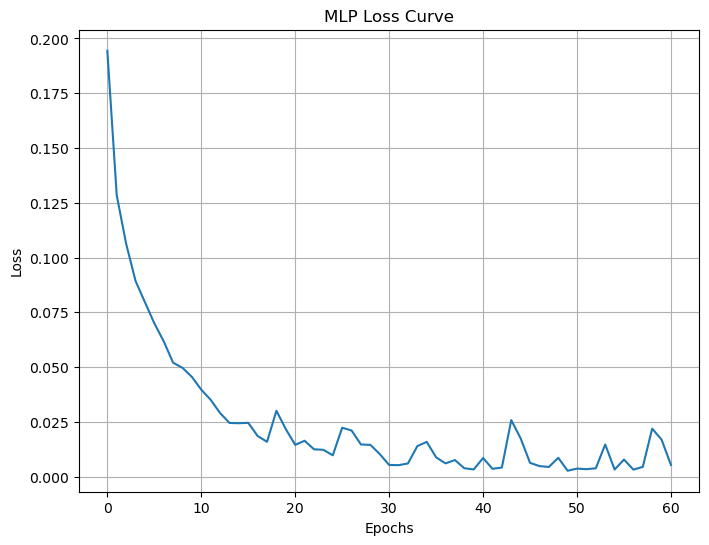

/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed w

In [10]:
# Import libraries
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



# Define MLP model with different hyperparameters
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    learning_rate_init=0.003,
    max_iter=100,
    batch_size=64,
    alpha=0.0001,
    random_state=42,
    early_stopping=False,  # Set to False to not stop early, so we can see full loss curve
    validation_fraction=0.2
    
)

# Train the model and capture loss curve
mlp.fit(X_train_vectors, y_train)

# Predict on the test set
y_pred = mlp.predict(X_test_vectors)

# Evaluate accuracy on the test set
accuracy_mlp = accuracy_score(y_test, y_pred)
print('Final MLP Accuracy:', accuracy_mlp)

# Plot loss curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.title('MLP Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# If you want to track accuracy over epochs, you can do a manual loop over epochs.
accuracies = []
for epoch in range(1, mlp.max_iter + 1):
    mlp.partial_fit(X_train_vectors, y_train, classes=np.unique(y_train))
    y_pred_epoch = mlp.predict(X_test_vectors)
    accuracies.append(accuracy_score(y_test, y_pred_epoch))



In [11]:
from sklearn.metrics import classification_report

In [12]:
y_pred = mlp.predict(X_test_vectors)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.67      0.77       317
           1       0.96      0.99      0.98      2677

    accuracy                           0.96      2994
   macro avg       0.94      0.83      0.87      2994
weighted avg       0.96      0.96      0.95      2994



In [13]:
accuracy_mlp = accuracy_score(y_test, y_pred)
accuracy_mlp

0.9575818303273214